In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate simple linear data
np.random.seed(0)
X = np.linspace(0, 10, 50)
Y = 3.5 * X + 6 + np.random.randn(50) * 3  # true slope=3.5, intercept=6


In [4]:
def compute_cost(m, c, X, Y):
    n = len(X)
    preds = m*X + c
    error = preds - Y
    return (1/(2*n)) * np.sum(error**2)


In [5]:
def compute_gradients(m, c, X, Y):
    n = len(X)
    preds = m*X + c
    error = preds - Y
    dm = (1/n) * np.sum(error * X)
    dc = (1/n) * np.sum(error)
    return dm, dc


In [6]:
def gradient_descent(X, Y, lr=0.01, epochs=200):
    m, c = 0, 0  # init
    cost_history = []

    for i in range(epochs):
        dm, dc = compute_gradients(m, c, X, Y)

        # update rule
        m = m - lr * dm
        c = c - lr * dc

        cost = compute_cost(m, c, X, Y)
        cost_history.append(cost)

        if i % 20 == 0:
            print(f"Epoch {i}: m={m:.3f} c={c:.3f} cost={cost:.3f}")

    return m, c, cost_history


In [7]:
m_final, c_final, cost_hist = gradient_descent(X, Y, lr=0.01, epochs=300)
print("\nFinal values:")
print("m =", m_final)
print("c =", c_final)


Epoch 0: m=1.463 c=0.239 cost=150.167
Epoch 20: m=4.197 c=1.045 cost=12.157
Epoch 40: m=4.143 c=1.414 cost=11.463
Epoch 60: m=4.090 c=1.764 cost=10.835
Epoch 80: m=4.040 c=2.098 cost=10.267
Epoch 100: m=3.993 c=2.415 cost=9.754
Epoch 120: m=3.948 c=2.716 cost=9.291
Epoch 140: m=3.905 c=3.003 cost=8.871
Epoch 160: m=3.864 c=3.275 cost=8.492
Epoch 180: m=3.825 c=3.534 cost=8.150
Epoch 200: m=3.788 c=3.780 cost=7.840
Epoch 220: m=3.753 c=4.014 cost=7.560
Epoch 240: m=3.720 c=4.237 cost=7.307
Epoch 260: m=3.688 c=4.449 cost=7.078
Epoch 280: m=3.658 c=4.650 cost=6.871

Final values:
m = 3.631098313726232
c = 4.832099619418324


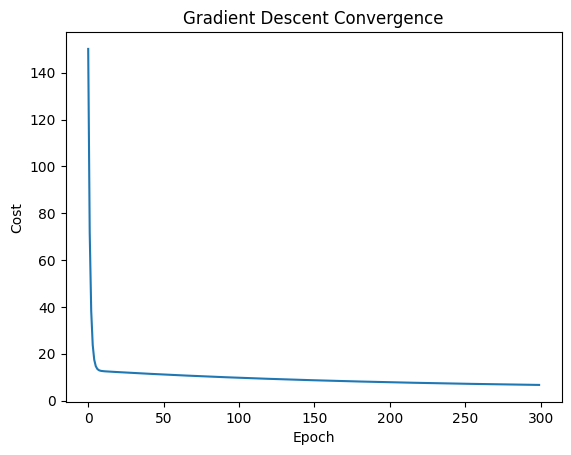

In [8]:
plt.plot(cost_hist)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.show()


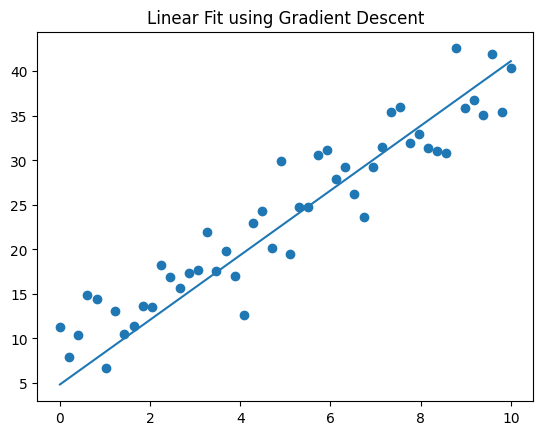

In [9]:
plt.scatter(X, Y)
plt.plot(X, m_final*X + c_final)
plt.title("Linear Fit using Gradient Descent")
plt.show()
